### Práctica de Formatos de datos: XML

El objetivo de esta práctica es crear una aplicación que gestionará información sobre los restaurantes de la ciudad de Madrid. 

Para ello se va a usar el catálogo "Restaurantes con perfil turístico de la ciudad de Madrid" del portal de datos abiertos del Ayuntamiento de Madrid. El conjunto de datos incluye información sobre restaurantes de la ciudad de Madrid divididos por tipos de cocina, especialidades, servicios, etc. Así mismo, se incluyen los datos básicos de cada punto, una descripción, su geoposición y dirección postal, así como un conjunto de fotografías relativas a cada punto. En los casos en los que aplica, se ofrecen horarios de apertura y costes de acceso si los tuviera.
La información se encuentra en:
https://datos.madrid.es/sites/v/index.jsp?vgnextoid=ce33a73970504510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

Y el conjunto de datos XML que hay que procesar está situado en:
https://datos.madrid.es/egob/catalogo/300033-10037079-turismo-restauracion.xml

Junto al enunciado de la práctica se proporciona el fichero xml a tratar. El siguiente trozo de código permite recuperar el archivo xml en cuestion, y mostrar su contenido.

In [14]:
from xml.etree import ElementTree
from xml.dom import minidom
def prettify(elem):
    """Return a pretty-printed XML string for the Element."""
    rough_string=ElementTree.tostring(elem,"utf-8")
    reparsed=minidom.parseString(rough_string)
    return reparsed.toprettyxml(indent="  ")

f=open("restaurantes_v1_es.xml","rt",encoding="utf8")
arbol=ElementTree.parse(f)
raiz=arbol.getroot()
print (prettify(raiz))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



__Ejercicio 1 [5 puntos]__

Se pide mostrar al usuario un listado de los nombres de los restaurantes que contiene el archivo con el objetivo de que elija un restaurante y se le muestre de forma amigable(sin etiquetas) por pantalla la información asociada al restaurante que se encuentra en el fichero recuperado:

* Nombre del restaurante: etiqueta name
* Email: etiqueta email
* Teléfono: etiqueta phone
* Descripción: etiqueta body
* Página web: etiqueta web
* Dirección: etiqueta address, etiqueta zipcode
* Horario: etiqueta horario
* Tipo de cocina: etiqueta Tipo


A continuación se le pedira si quiere ver fotos del restaurante, en tal caso se le mostrarán las fotos recuperadas del restaurante. Para mostrar las imagenes puedes usar un trozo de código similar al siguiente.

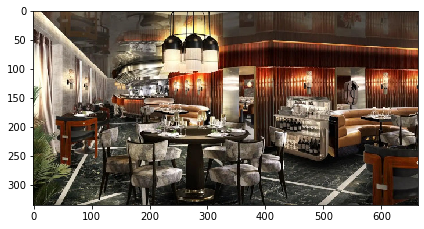

In [13]:
img_src = 'https://estaticos.esmadrid.com/cdn/farfuture/OdE0pLpf9itK-izdD2Qz8DzXCB2y9S2Prl8AYfNeTiA/mtime:1664200548/sites/default/files/recursosturisticos/restaurantes/joel_robuchon_4.jpg'
from skimage import io
image = io.imread(img_src)
io.imshow(image)
io.show()

Despues de mostrar la información y las imagenes del restaurante elegido se le preguntará si desea volver a ver el listado de restaurantes para ver otro o bien desea finalizar.

Observar:
  * Algunas etiquetas podrían estar vacías o no aparecer. En estos casos, simplemente se mostrará vacío o con la palabra "Desconocido".
  * Hay que limpiar el texto de la descripción eliminando los símbolos especiales del tipo tales como "&lt;/p&gt;&lt;p&gt;" que aparecen en el mismo.

Por ejemplo si el usuario hubiera elegido el restaurante "Hasaku Nikkei" debería mostrarse por pantalla:

__Nombre del restaurante:__

Hasaku Nikkei
    
__Descripción:__
La apuesta culinaria por la cocina nikkei del chef peruano Jhosef Arias se traduce en este restaurante situado en el barrio de Las Tablas. De estética minimalista, en él se puede disfrutar de la mezcla de dos culturas gastronómicas: la peruana y la japonesa, una de las muestras más notorias de la fusión cultural a través de la cocina.El nombre Hasaku proviene del japonés y hace referencia a una naranja agria e híbrida, que, en este caso, tiene relación con la lima y los cítricos, hilo conductor de la cocina peruana. Con este nombre se busca ofrecer una especie de reconocimiento y agradecimiento a la enorme influencia que supuso la inmigración y la cocina japonesa en la gastronomía peruana.Hasaku comenzó siendo un proyecto virtual llevado a cabo durante el cierre de los restaurantes por la pandemia provocada por la COVID-19, al que el chef dedicó muchas horas de experimentación.En su carta se pueden encontrar platos excepcionales que se pueden disfrutar tanto en el local como en casa gracias a su servicio de envio a domicilio. No disponen de menú diario pero sí de dos menús degustación con los platos más destacados de su propuesta gastronomíca.Arias se ha convertido en un referente de la gastronomía peruana en Madrid, donde cuenta con otros restaurantes: Piscomar, en Lavapiés; Humo, en Puente de Vallecas; Callao24, en Arturo Soria; y su más reciente creación,ADN Origen Perú, en la calle Mayor, junto al Mercado de San Miguel. En todos ellos ensalza distintos aspectos de la gastronomía de su tierra. No en vano forma parte de los 50 chefs del movimiento Generación con Causa, creado en Perú para promover la cocina peruana en el mundo, a través de la cuarta generación de cocineros, avalados por el reconocido chef peruano Gastón Acurio.

__Página web:__

https://www.esmadrid.com/restaurantes/hasaku-nikkei
    
__Email:__

Desconocido
    
__Teléfono:__

(+34) 91 210 54 43

__Localización:__ 

María Tubau, 17. Madrid 28050

__Horario:__ 

Mar; Sáb: 13:00-16:00h/20:00- 01:00 ; Domingo: 13:00-16:00 h

__Tipo de cocina:__ 

Internacional: Fusión, Internacional, Japonesa, Peruana

In [12]:
from xml.dom import minidom
from skimage import io
from bs4 import BeautifulSoup 
import time




def mostrar_img(url):
    image = io.imread(url)
    io.imshow(image)
    io.show()
        
            
def normalize_text(str):
    str = BeautifulSoup(str, "lxml").text
    return str


def imprimir_info(sel, restaurantes):
    for i in restaurantes:
        nombre = i.getElementsByTagName("name")[0].childNodes[0].data
        if(nombre == sel):
            basicData = i.getElementsByTagName("basicData")[0]
            geoData = i.getElementsByTagName("geoData")[0]
            extra = i.getElementsByTagName("extradata")[0]
            mul = i.getElementsByTagName("multimedia")[0]
            #nombre
            print("Nombre del restaurante: ")
            print(normalize_text(sel))
            print("------------------------\n")
            
            #descripción
            if  basicData.getElementsByTagName("body")[0].childNodes:
                descripcion = basicData.getElementsByTagName("body")[0].childNodes[0].data
            else:
                descripcion= "desconocido"
            print("Descripción: ")
            print(normalize_text(descripcion))
            print("------------------------\n")

            
            #Pagina web
            if basicData.getElementsByTagName("web")[0].childNodes:
                web = basicData.getElementsByTagName("web")[0].childNodes[0].data
            else:
                web = "desconocido"
            print("Página web: ")
            print(web)
            print("------------------------\n")

            
            #email
            if  basicData.getElementsByTagName("email")[0].childNodes:
                email = basicData.getElementsByTagName("email")[0].childNodes[0].data
            else:
                email = "desconocido"
            print("Email: ")
            print(email)
            print("------------------------\n")
            
            #Telefono
            if basicData.getElementsByTagName("phone")[0].childNodes:
                telefono = basicData.getElementsByTagName("phone")[0].childNodes[0].data
            else:
                telefono = "desconocido"
            print("Telefono: ")
            print(telefono)
            print("------------------------\n")
            
            #localización
            print("Localización: ")
            if  geoData.getElementsByTagName("address")[0].childNodes and geoData.getElementsByTagName("zipcode")[0].childNodes:
                adress = geoData.getElementsByTagName("address")[0].childNodes[0].data
                zipcode =  geoData.getElementsByTagName("zipcode")[0].childNodes[0].data
                print(normalize_text(adress + ", " + zipcode))
                print("------------------------\n")
            else:
                print("desconocido")
                print("------------------------\n")
        
            
            #horario
            horario = "desconocido"
            for i in extra.getElementsByTagName("item"):
                if i.getAttribute("name") and i.getAttribute("name") == "Horario":
                    horario = i.childNodes[0].data
            print("Horario: ")
            print(normalize_text(horario))
            print("------------------------\n")
            
            #tipo
            print("Tipo de cocina: ")
            for i in extra.getElementsByTagName("categorias")[0].getElementsByTagName("categoria"):
                categoria = "desconocido"
                subcategoria = []
                for item in i.getElementsByTagName("item"):
                    if item.getAttribute("name") and item.getAttribute("name") == "Categoria":
                        categoria =  item.childNodes[0].data
                if i.getElementsByTagName("subcategorias") and categoria != "desconocido":
                    for sub in i.getElementsByTagName("subcategorias")[0].getElementsByTagName("subcategoria"):
                        for subitem in sub.getElementsByTagName("item"):
                            if subitem.getAttribute("name") and subitem.getAttribute("name") == "SubCategoria":
                                subcategoria.append(normalize_text(subitem.childNodes[0].data))
                print(normalize_text(categoria), end= "")
                if len(subcategoria) > 0:
                    print(": ", end="")
                    print(*subcategoria, sep= ", ")
            print("\n------------------------\n")
        
                    
            
            #imagenes
            elec = input("¿Desea ver imagenes? S/N: ")
            while elec.upper() != "S" and elec.upper() != "N":
                elec = input("¿Desea ver imagenes? S/N: ")
            if elec.upper() == "S":
                for img in mul.getElementsByTagName("media"):
                    if img.getAttribute("type") and img.getAttribute("type") == "image":
                        mostrar_img(img.getElementsByTagName("url")[0].childNodes[0].data)

def lista_restaurantes(restaurantes):
    ret = []
    for i in restaurantes:
        basicData = i.getElementsByTagName("basicData")[0]
        nombre = basicData.getElementsByTagName("name")[0].childNodes[0].data
        if nombre not in ret:
            ret.append(nombre)
    return ret

def elegir_restaurante(restaurantes):
    #obtengo los restaurantes disponibles
    restaurantes_disponibles = lista_restaurantes(restaurantes)
    #seleccion de usuario
    print(*restaurantes_disponibles, sep=" /  ")    
    time.sleep(2)
    sel = input("Seleccione un restaurante de la lista: ")
    while sel not in restaurantes_disponibles:
         sel = input("Seleccione un restaurante de la lista: ")
    return sel

def programa_restaurantes(restaurantes):
    fin = False
    while not fin:
        print()
        sel = elegir_restaurante(restaurantes)
        imprimir_info(sel, restaurantes)
        el = input("¿Desea ver otro restaurante? S/N")
        while el.upper() != "S" and el.upper() != "N":
             el = input("¿Desea ver otro restaurante? S/N")
        if el.upper() == "N":
            fin = True

        
        


Robuchon Espa&ntilde;a /  Abbas&iuml;d /  El Lince /  Hasaku Nikkei /  La Negra Tomasa /  Desde 1911 /  Papagena /  RavioXO /  Incl&aacute;n Brutal Bar /  DSPEAK /  Mad Gourmets /  Zen Noodle Bar /  ZEN Asian Supper Club /  Madame Butterfly /  Bakan /  Sagrario Tradici&oacute;n /  Garelos /  NOI /  Vinoteca Morat&iacute;n /  Casa Mortero /  Taberna &Uacute;beda /  Quimbaya /  Trattoria Adriana /  La &Uacute;nica /  Commodore Madrid /  La m&aacute;s croqueta /  El Taller /  Miss Sushi /  La Terraza del Santo Domingo /  MO de Movimiento /  Coquetto Bar /  Shukran City Ventas /  Santa y Pura /  Mune Madrid /  Le&ntilde;a /  Smoked Room /  Barbecho  /  Diurno /  Deessa /  Villa Verbena /  Citynizer Plaza /  Barracuda MX /  Aloha Pok&eacute; /  Tripea /  Castelados /  La Maruca /  La MaM&aacute; Restaurante /  Quinqu&eacute; /  Saddle /  Bocanegra /  Dani Brasserie /  Bloom /  La Venencia /  Gran V&iacute;a 55 /  Bodega de La Ardosa /  Casa Julio /  Casa Camacho /  Bodegas Ricla /  Bar San

Seleccione un restaurante de la lista: Caf&eacute; Varela Restaurante (Hotel Preciados)
Nombre del restaurante: 
Café Varela Restaurante (Hotel Preciados)
------------------------

Descripción: 
En 1896, abrió sus puertas uno de los lugares con más solera de la capital, punto de reunión en la época dorada de los cafés y tertulias literarias de grandes intelectuales como los hermanos Machado, Miguel de Unamuno, Emilio Carrere, León Felipe o Rafael Alberti. De la mano de su actual propietario, Melquíades Álvarez, se ha convertido en el restaurante del Hotel Preciados, aunque sigue siendo un emblemático lugar cargado de historia que ha sido modernizado para adaptarse a los tiempos actuales.Con una decoración elegante a la par que sencilla, el local destaca por su cocina de raíces gallegas aunque no puede faltar el cocido madrileño, que se sirve todos los jueves. Su carta se compone, además de menús de distintos precios y el diario, de platos tradicionales de la cocina gallega, como la mer

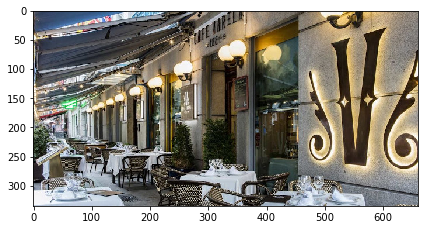

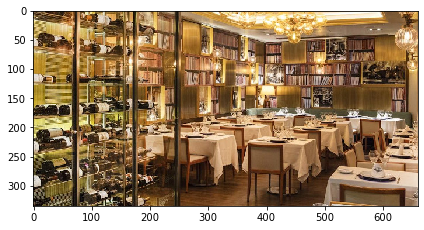

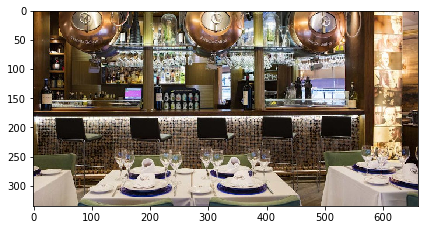

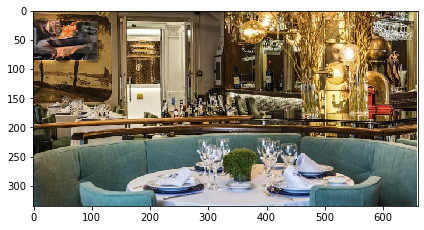

¿Desea ver otro restaurante? S/Ns

Robuchon Espa&ntilde;a /  Abbas&iuml;d /  El Lince /  Hasaku Nikkei /  La Negra Tomasa /  Desde 1911 /  Papagena /  RavioXO /  Incl&aacute;n Brutal Bar /  DSPEAK /  Mad Gourmets /  Zen Noodle Bar /  ZEN Asian Supper Club /  Madame Butterfly /  Bakan /  Sagrario Tradici&oacute;n /  Garelos /  NOI /  Vinoteca Morat&iacute;n /  Casa Mortero /  Taberna &Uacute;beda /  Quimbaya /  Trattoria Adriana /  La &Uacute;nica /  Commodore Madrid /  La m&aacute;s croqueta /  El Taller /  Miss Sushi /  La Terraza del Santo Domingo /  MO de Movimiento /  Coquetto Bar /  Shukran City Ventas /  Santa y Pura /  Mune Madrid /  Le&ntilde;a /  Smoked Room /  Barbecho  /  Diurno /  Deessa /  Villa Verbena /  Citynizer Plaza /  Barracuda MX /  Aloha Pok&eacute; /  Tripea /  Castelados /  La Maruca /  La MaM&aacute; Restaurante /  Quinqu&eacute; /  Saddle /  Bocanegra /  Dani Brasserie /  Bloom /  La Venencia /  Gran V&iacute;a 55 /  Bodega de La Ardosa /  Casa Julio /  Casa C

Seleccione un restaurante de la lista: Maceiras (Jes&uacute;s)
Nombre del restaurante: 
Maceiras (Jesús)
------------------------

Descripción: 
Como no podía ser de otra manera, en este lugar de tapeo gallego se sirven unas raciones exquisitas con todo el sabor de Galicia: caldo gallego, deliciosa ensalada pobre, pimientos de padrón, champiñones con lacón, quesos de Galicia, chorizo criollo, empanada casera, croquetas de bacalao, mejillones tigre, berberechos al vapor y, por supuesto, el estupendo pulpo.Entre semana tienen platos del día como el muy recomendable arroz marinero, perfecto para el almuerzo. Como acompañamiento, cerveza y vinos gallegos: blancos (albariños, godellos) y tintos (mencías). Es casi como sentirse en tierras gallegas. Toda una taberna gallega donde se practica una auténtica cocina casera, en un ambiente de lo más informal, con mesas y bancos de madera.  Maceiras tiene otra sucursal en la calle Jesús.
------------------------

Página web: 
https://www.esmadrid.c

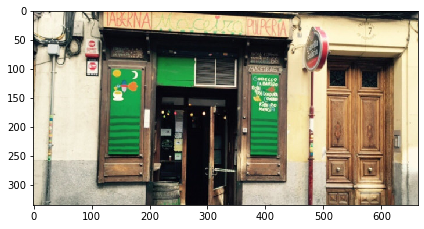

¿Desea ver otro restaurante? S/Nn


In [2]:
file = minidom.parse('restaurantes_v1_es.xml')
restaurantes = file.getElementsByTagName('service')

programa_restaurantes(restaurantes)

__Ejercicio 2 [2.5 puntos]__

Este ejercicio se pide crear un buscador sobre la información recuperada, de forma que el usuario podrá buscar restaurantes por el tipo de cocina ofrecida en un restaurante. Para ello se le mostrará un listado con los diferentes tipos de cocina que se han encontrado en el fichero, y el usuario elegirá un tipo de cocina.  Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1. 

Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [11]:
#EJERCICIO 2
from xml.dom import minidom
from geopy.geocoders import Nominatim

file = minidom.parse('restaurantes_v1_es.xml')
services = file.getElementsByTagName('service')
comidas = {}
listaRest = []

def buscaTipos():
    categorias = file.getElementsByTagName('categorias')
    for categoria in categorias:
        items = categoria.getElementsByTagName('item')
        tipo = ""
        for item in items:
            if(item.getAttribute('name') == "Categoria"):
                tipo = item.childNodes[0].data
                if(tipo not in comidas):
                    comidas[tipo] = []
        subcategorias = categoria.getElementsByTagName('subcategoria')
        if(len(subcategorias) > 0):
            for subcategoria  in subcategorias:
                items = categoria.getElementsByTagName('item')
                for item in items:
                    if(item.getAttribute('name') == "SubCategoria"):
                        subtipo = item.childNodes[0].data
                        if(subtipo not in comidas[tipo]):
                            comidas[tipo].append(subtipo)

    for i in comidas:
        print(i)
        #print("  SUBTIPOS: ")
        #for j in comidas[i]:
            #print("  " + j)


def buscaRest(comidaSeleccionada):
    for restaurante in services:
        items = restaurante.getElementsByTagName('item')
        for item in items:
            if(item.getAttribute('name') == "SubCategoria" or item.getAttribute("name") == "Categoria"):
                if(item.childNodes[0].data == comidaSeleccionada):
                    nombre = restaurante.getElementsByTagName("name")
                    if(nombre[0].childNodes[0].data not in listaRest):
                        listaRest.append(nombre[0].childNodes[0].data)

    print()
    print("RESTAURANTES CON LA COMIDA " + comidaSeleccionada + ": ")
    for rest in listaRest:
        print("    " + rest)

def ej2():
    print("Seleccione un tipo de comida: ")
    comidaSelec = input()
    buscaRest(comidaSelec)
    print("Seleccione restaurante de los mostrados: ")
    restSelec = input()
    imprimir_info(restSelec, services)  

Internacional
De autor
Tapas
Española
Multiespacio
Tabernas
Especiales
Bares
Vegano
Vegetariano
Seleccione un tipo de comida: 
Bares

RESTAURANTES CON LA COMIDA Bares: 
    Robuchon Espa&ntilde;a
    Hasaku Nikkei
    La Negra Tomasa
    Incl&aacute;n Brutal Bar
    Zen Noodle Bar
    ZEN Asian Supper Club
    Madame Butterfly
    Bakan
    NOI
    Quimbaya
    Trattoria Adriana
    La &Uacute;nica
    Commodore Madrid
    El Taller
    Miss Sushi
    MO de Movimiento
    Shukran City Ventas
    Mune Madrid
    Diurno
    Barracuda MX
    Aloha Pok&eacute;
    Tripea
    Bocanegra
    Bloom
    Gran V&iacute;a 55
    Ovillo
    V&aacute;lgame Dios
    Maddock 
    Yugo the Bunker
    99 KŌ Sushi Bar
    Occhiali
    Aitatxu
    Hong Kong 70
    Zest
    Salutteria
    Kippu
    P&oacute;lvora
    La Ventana de Flavia
    Da Luca Trattoria - Pizzeria
    Chido Castizo &amp; Ching&oacute;n
    El Jefe Traveling Food
    La Carlota	
    La Verit&aacute;
    Pieology
    Guillermina
    Ra

¿Desea ver imagenes? S/N: s


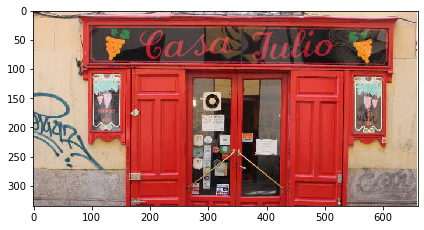

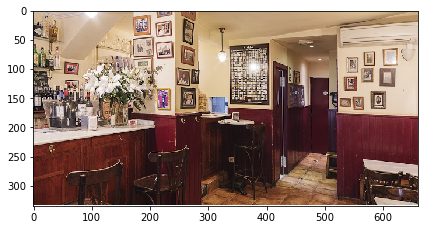

Quiere buscar otra vez? (Si/No)
Si
Seleccione un tipo de comida: 
Tabernas

RESTAURANTES CON LA COMIDA Tabernas: 
    Robuchon Espa&ntilde;a
    Hasaku Nikkei
    La Negra Tomasa
    Incl&aacute;n Brutal Bar
    Zen Noodle Bar
    ZEN Asian Supper Club
    Madame Butterfly
    Bakan
    NOI
    Quimbaya
    Trattoria Adriana
    La &Uacute;nica
    Commodore Madrid
    El Taller
    Miss Sushi
    MO de Movimiento
    Shukran City Ventas
    Mune Madrid
    Diurno
    Barracuda MX
    Aloha Pok&eacute;
    Tripea
    Bocanegra
    Bloom
    Gran V&iacute;a 55
    Ovillo
    V&aacute;lgame Dios
    Maddock 
    Yugo the Bunker
    99 KŌ Sushi Bar
    Occhiali
    Aitatxu
    Hong Kong 70
    Zest
    Salutteria
    Kippu
    P&oacute;lvora
    La Ventana de Flavia
    Da Luca Trattoria - Pizzeria
    Chido Castizo &amp; Ching&oacute;n
    El Jefe Traveling Food
    La Carlota	
    La Verit&aacute;
    Pieology
    Guillermina
    Raimunda
    Monsieur Sushita
    Sottosopra
    Noname B

¿Desea ver imagenes? S/N: n
Quiere buscar otra vez?
No


In [5]:
buscaTipos()
ej2()
print("Quiere buscar otra vez? (Si/No)")
respuesta = input().capitalize()
while(respuesta == "Si" or respuesta == "Yes"):
    ej2()
    print("Quiere buscar otra vez?")
    respuesta = input().capitalize()

 __Ejercicio 3[2.5 puntos]__

Este ejercicio se pide crear un buscador de restaurantes por cercania a una calle indicada por el usuario. Para ello se usará la librería GeoPy que se usó en la práctica 2 y la información de latitud y longitud que aparece en el archivo xml de cada uno de los restaurantes. Se le preguntará al usuario que introduzca por teclado el nombre de la información de la calle, y la distancia en kilómetros de cercania.
 
Como resultado debería mostrarse un listado de todas los restaurantes que cumplen las condiciones impuestas por el usuario. Se mostrará los nombres de los restaurantes. A continuación el usuario elegirá uno de los restaurantes y entonces se le mostrará  la misma información del restaurante que en el ejercicio 1.  En caso de no existir un restaurante con las condiciones dadas, se mostrará un mensaje informativo.

 Después de mostrarle la información, se le volverá a preguntar si quiere seguir buscando. Entre las opciones del menú deberá existir una que sea para finalizar la búsqueda.

In [8]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

from xml.dom import minidom
from geopy.geocoders import Nominatim

file = minidom.parse('restaurantes_v1_es.xml')
Restaurantes = file.getElementsByTagName('service')

def obtener_coordenadas(nombre_calle):
    from geopy.geocoders import Nominatim
    geolocator = Nominatim(user_agent="Monumentos_Cerca")
    lugar = nombre_calle+", Madrid, España"
    return geolocator.geocode(lugar, addressdetails=True)

def elegir_restaurante_info(sel):
    if sel == True:
        print("Indique un restaurante para más información")
        restaurante_seleccionado = input()
        encontrado = False
        for i in Restaurantes:
            nombre = i.getElementsByTagName("name")[0].childNodes[0].data
            if(nombre.lower() == restaurante_seleccionado.lower()):
                encontrado = True
                print("Tenemos toda la información de su restaurante:" + "\n")
                imprimir_info(nombre, Restaurantes)
                break

        if not encontrado:
            print("No se puede encontrar el restaurante")
            print("¿Quiere probar otro nombre de restaurante? (Si/No)")
            respuesta_otro = input().capitalize()
            if(respuesta_otro == "Si"):
                elegir_restaurante_info()

        print("¿Quiere realizar otra busqueda? (Si/No)")
        respuesta = input().capitalize()
        if(respuesta == "Si"):
            print("*--------------------------------------*")
            restaurantes_cerca()
    else: 
        print("¿Quiere realizar otra busqueda? (Si/No)")
        respuesta = input().capitalize()
        if(respuesta == "Si"):
            print("*--------------------------------------*")
            restaurantes_cerca()

        

def restaurantes_cerca():
    n = 0
    print("Nombre la calle de Madrid en la que quiera buscar restaurantes cerca:")  
    calle_buscada = input()
    print("Distancia máxima a la que quiere buscar:")
    distancia_max = input()
    print("Buscando restaurantes cerca de: ")
    print(calle_buscada,"a",distancia_max, "km", "\n")
    coor_calle_buscada = obtener_coordenadas(calle_buscada)
    
    for i in Restaurantes:
        direccion = i.getElementsByTagName("geoData")[0]
        latitude = direccion.getElementsByTagName("latitude")[0].childNodes[0].data
        longitude = direccion.getElementsByTagName("longitude")[0].childNodes[0].data
        if(latitude !="" and longitude !=""):
            lat = float(latitude)
            lon = float(longitude)
        distancia = haversine(coor_calle_buscada.latitude, coor_calle_buscada.longitude, lat, lon)
        if(distancia <=float(distancia_max)):
            n += 1
            nombre = i.getElementsByTagName("name")[0].childNodes[0].data
            print(nombre)
    if(n == 0):
        print("No hay monumentos cerca.")
        print("*--------------------------------------*")
        elegir_restaurante_info(False)
    else:
        print("Hay un total de "+str(n)+" restaurantes cerca.")
        print("*--------------------------------------*")
        elegir_restaurante_info(True)



Nombre la calle de Madrid en la que quiera buscar restaurantes cerca:
Atocha
Distancia máxima a la que quiere buscar:
1
Buscando restaurantes cerca de: 
Atocha a 1 km 

Vinoteca Morat&iacute;n
Tablafina
Yugo the Bunker
Xantar Astur
Puerta de Atocha
As Fontes
NuBel
La Taberna Murciana
La Plater&iacute;a
Arzabal (Reina Sof&iacute;a)
La berenjena
El puchero de mi abuela
O Pazo de Lugo
La Ver&oacute;nica
Bodega de Los Secretos
Murillo Caf&eacute;
Trattoria Pinocchio (S&aacute;nchez Bustillo)
Han Gang
Trattoria SantArcangelo
La Taper&iacute;a del Prado
The Cask
Los Rotos
El Brillante
Don Giovanni
Bodegas Rosell
Samarkanda
Hay un total de 26 restaurantes cerca.
*--------------------------------------*
Indique un restaurante para más información
Don Giovanni
Tenemos toda la información de su restaurante:

Nombre del restaurante: 
Don Giovanni
------------------------

Descripción: 
Abierta desde 2005, esta trattoria ofrece auténtica cocina italiana elaborada por el reconocido chef Andrea Tumb

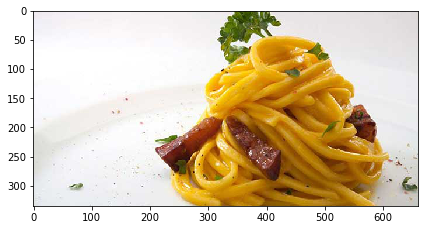

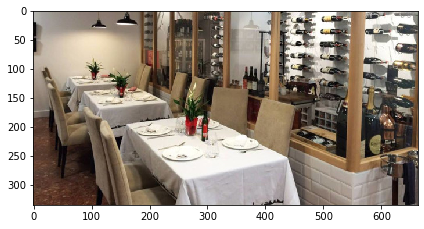

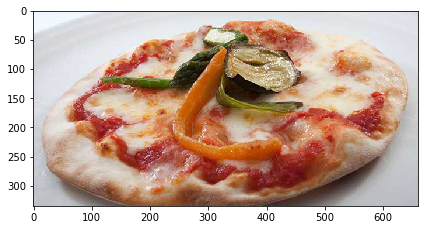

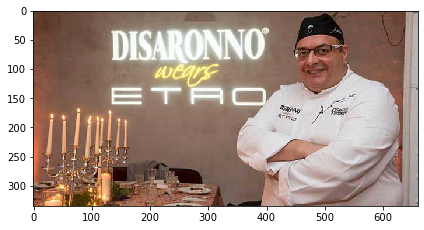

¿Quiere realizar otra busqueda? (Si/No)
Si
*--------------------------------------*
Nombre la calle de Madrid en la que quiera buscar restaurantes cerca:
priorato
Distancia máxima a la que quiere buscar:
1
Buscando restaurantes cerca de: 
priorato a 1 km 

No hay monumentos cerca.
*--------------------------------------*
¿Quiere realizar otra busqueda? (Si/No)
Si
*--------------------------------------*
Nombre la calle de Madrid en la que quiera buscar restaurantes cerca:
velazquez
Distancia máxima a la que quiere buscar:
1
Buscando restaurantes cerca de: 
velazquez a 1 km 

Bakan
NOI
La &Uacute;nica
Coquetto Bar
Castelados
La Maruca
Saddle
Patio de Leones
Berlanga
Hermanos Vinagre
99 KŌ Sushi Bar
Zest
Salutteria
Kippu
P&oacute;lvora
La Ventana de Flavia
Flora Fina
Chigre
Las Carboneras de Lu
La Tasca del Retiro
Barra y Mantel
Meste&ntilde;o Bar
Monsieur Sushita
Sottosopra
Noname Bar
Taberna Bandido
Sinsombrero
Yakiniku Rikyu
Tres por Cuatro
Cilindro
Alameda 
Shinatora Ya
La Catapa
La 

In [10]:
restaurantes_cerca()

Normas de entrega

   * Fecha tope de entrega: 06/10/2022
   * La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre FormatosII_GrupoX donde X será el número de grupo correspondiente.
